In [2]:
import pandas as pd

In [3]:
#nombres de columnas
col_names = ["B","G","R","CLASS"]

In [4]:
#obtener datos de archivo y mostrar caracteristicas
data_real=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt",sep='\t',header=None,names=col_names)
data_real.info()
data_real.dropna(inplace=True)
data_real.head()
data_real.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
B        245057 non-null int64
G        245057 non-null int64
R        245057 non-null int64
CLASS    245057 non-null int64
dtypes: int64(4)
memory usage: 7.5 MB


B    G    R  CLASS
245052  163  162  112      2
245053  163  162  112      2
245054  163  162  112      2
245055  163  162  112      2
245056  255  255  255      2

In [5]:
# mas caracteristicas
data_real.describe()

B              G              R          CLASS
count  245057.000000  245057.000000  245057.000000  245057.000000
mean      125.065446     132.507327     123.177151       1.792461
std        62.255653      59.941197      72.562165       0.405546
min         0.000000       0.000000       0.000000       1.000000
25%        68.000000      87.000000      70.000000       2.000000
50%       139.000000     153.000000     128.000000       2.000000
75%       176.000000     177.000000     164.000000       2.000000
max       255.000000     255.000000     255.000000       2.000000

In [6]:
print (data_real['CLASS'].count())
print (data_real['CLASS'].value_counts())

245057
2    194198
1     50859
Name: CLASS, dtype: int64


In [7]:
#Separacion de caracteristicas y variable respuesta
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

nombres_col=col_names
print nombres_col
X=data_real[nombres_col[0:len(nombres_col)-1]]
y=data_real[nombres_col[len(nombres_col)-1]]

['B', 'G', 'R', 'CLASS']


In [8]:
#Ajuste de parametros modelo Kneighhbors
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



/opt/cloudera/parcels/Anaconda-4.2.0/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Chequear accuracy de classificaci√≥n de KNN con K=5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.999494001469
0.998784170687
1.0


In [10]:

#ajuste de parametro k
k_range = list(range(1, 5))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)



[0.99948311015890123, 0.99948855085531041, 0.99953751889915987, 0.99942870023453101]


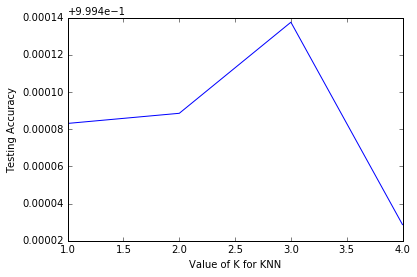

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.999575614135
0.99898007218
1.0


In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[ 0.96759977  0.9954705   0.99857178  0.99336884  0.99700061]


In [14]:
print(scores.mean())
print(cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy').mean())

0.990402298907
0.999314448271


In [28]:
# 40 ejemplos con modelo kneightbors
from sklearn.model_selection import RepeatedKFold
from scipy import stats

rkf = RepeatedKFold(n_splits=2, n_repeats=4, random_state=2652124)
#print(X.values)
count=0
results_knn = []
results_knnscore = []
results_knnscoref1 = []
results_knnscorerecall = []
for train_index, test_index in rkf.split(X.values):
    count=count+1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    #knn = KNeighborsClassifier(n_neighbors=count)
    #knn.fit(X_train, y_train)
    #y_pred = knn.predict(X_test)
    #print(metrics.accuracy_score(y_test, y_pred))
   
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results_knn.append(metrics.accuracy_score(y_test, y_pred))
    scores_acc = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')
    scores_recall = cross_val_score(knn, X_test, y_test, cv=5, scoring='recall_macro')
    scores_f1 = cross_val_score(knn, X_test, y_test, cv=5, scoring='f1_macro')
    results_knnscore.append(scores_acc.mean())
    results_knnscorerecall.append(scores_recall.mean())
    results_knnscoref1.append(scores_f1.mean())
    
    
 
    
    
print(np.mean(results_knn))   
print(np.mean(results_knnscore))
print(np.mean(results_knnscorerecall))
print(np.mean(results_knnscoref1))

0.999504196966
0.991172621885
0.985547303758
0.986345265454


In [29]:
# 40 ejemplos usando Kfold modelo SVM
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import numpy as np
from sklearn.cross_validation import cross_val_score
rkf = RepeatedKFold(n_splits=2, n_repeats=4, random_state=2652124)
resultados_gsn=[]
results_gsnscore = []
results_gsncorerecall = []
results_gsncoref1 = []

for train_index, test_index in rkf.split(X):
    #count=count+1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    cls = GaussianNB()
    cls.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    resultados_gsn.append(metrics.accuracy_score(y_test, y_pred))
    scores_acc = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')
    scores_recall = cross_val_score(knn, X_test, y_test, cv=5, scoring='recall_macro')
    scores_f1 = cross_val_score(knn, X_test, y_test, cv=5, scoring='f1_macro')
    results_gsnscore.append(scores.mean())
    results_gsncorerecall.append(scores_recall.mean())
    results_gsncoref1.append(scores_f1.mean())
#    resultados_gsn.append(scores.mean())
print(np.mean(resultados_gsn))
print(np.mean(results_gsnscore))
print(np.mean(results_gsncorerecall))
print(np.mean(results_gsncoref1))


0.999600093023
0.923627128559
0.985547303758
0.986345265454


In [27]:
#prueba de hipotesis

In [32]:
t_stat, p_val =  stats.ttest_ind(y_test,y_pred)
print(t_stat)
print(p_val)

0.249481793176
0.802988331795
